# Exploiter l’historique des enregistrements 

Importation

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC





In [16]:
# Chemins vers les fichiers CSV nettoyés
chemin_fichier_2018 = '/home/yvanoide/iadev-python/EAU/Data_2018.csv'
chemin_fichier_2019 = '/home/yvanoide/iadev-python/EAU/Data_2019.csv'
chemin_fichier_2020 = '/home/yvanoide/iadev-python/EAU/Data_2020.csv'

Charger les données

In [17]:
# Charger les données à partir des fichiers CSV
donnees_2018 = pd.read_csv(chemin_fichier_2018)
donnees_2019 = pd.read_csv(chemin_fichier_2019)
donnees_2020 = pd.read_csv(chemin_fichier_2020)

# EDA

In [18]:

donnees_combinees = pd.concat([donnees_2018, donnees_2019, donnees_2020], ignore_index=True)
descriptive_stats = donnees_combinees.describe()
print(descriptive_stats)


               sno      lat_gis     long_gis          gwl          E.C  \
count  1106.000000  1106.000000  1106.000000  1095.000000  1106.000000   
mean    189.420434    17.708504    78.790897     8.590411  1362.238698   
std     110.031182     0.852864     0.818382     7.525315   861.061139   
min       1.000000    15.896441    77.444000     0.170000   205.000000   
25%      94.000000    17.136028    78.184623     3.060000   782.000000   
50%     188.500000    17.639128    78.579444     5.930000  1179.500000   
75%     285.000000    18.359652    79.351937    12.380000  1673.500000   
max     379.000000    19.730555    80.920000    43.170000  9499.000000   

               TDS         CO3         HCO3           Cl            F  \
count  1106.000000  946.000000  1106.000000  1106.000000  1106.000000   
mean    871.832767    6.822446   300.751525   194.258590     1.117159   
std     551.079129   17.217132   135.121572   200.599198     0.783118   
min     131.200000    0.000000    30.0000

Visulaisation , Histogrammes pour chaque variable

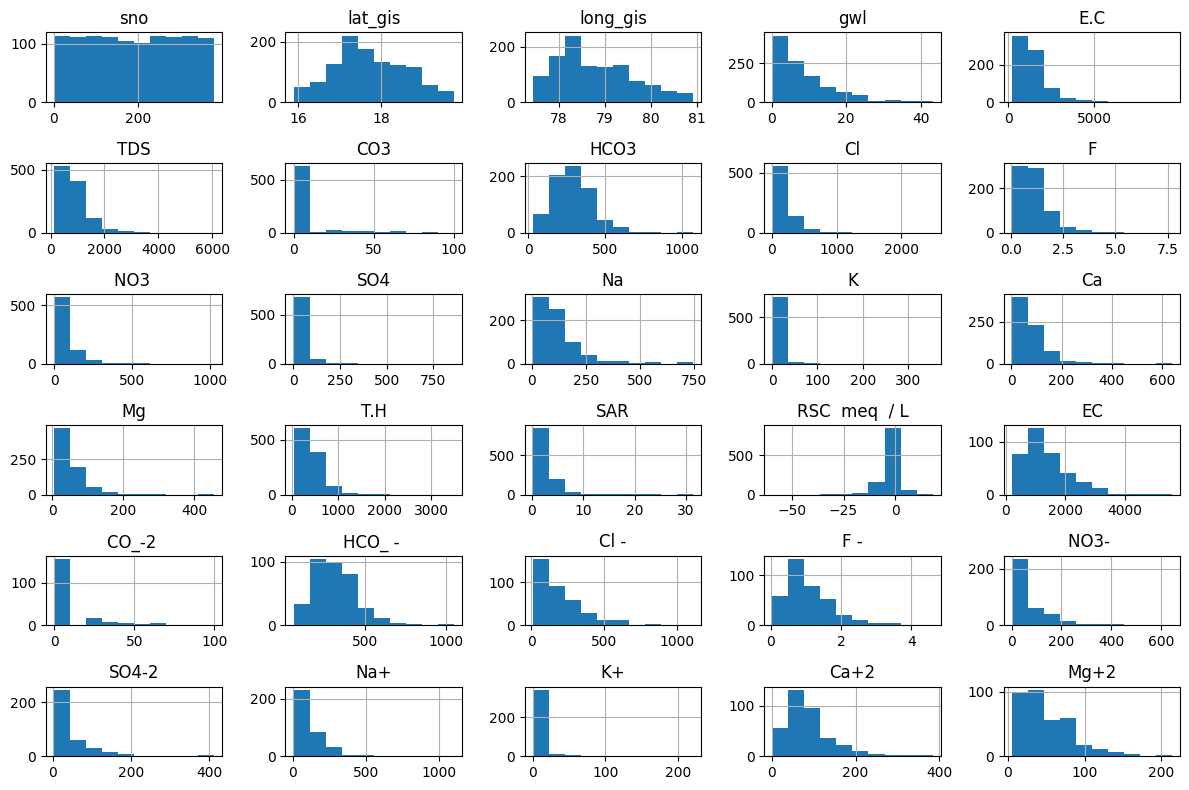

In [63]:

donnees_combinees.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


Matrice de corélation

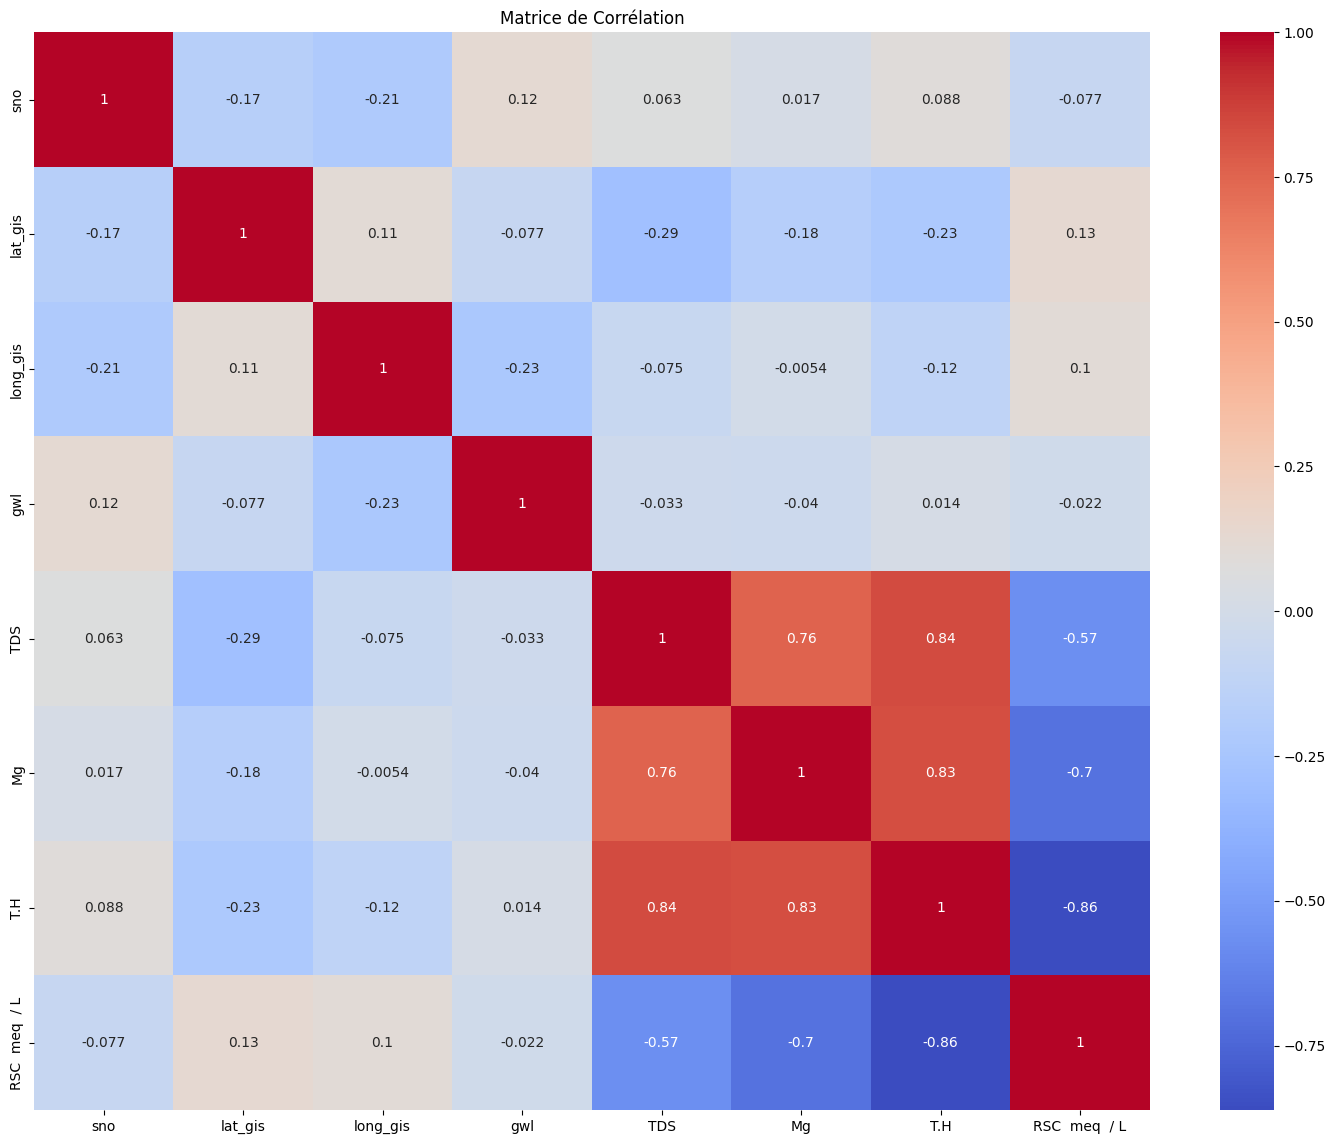

In [91]:
# Matrice de corrélation avec heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

In [ ]:
# Relations avec la variable cible (Exemple avec 'Classification')
sns.boxplot(x='Classification', y='TDS', data=donnees_combinees)
plt.title('Relation entre Classification et TDS')
plt.show()


Selectionne moi que 10 features

In [79]:
colonnes_a_garder = ['sno', 'lat_gis', 'long_gis', 'gwl', 'TDS', 'Mg', 'T.H', 'RSC  meq  / L']

In [88]:
donnees_combinees = pd.concat([donnees_2018, donnees_2019, donnees_2020], ignore_index=True)


Matrice de corrlation avec données choisi

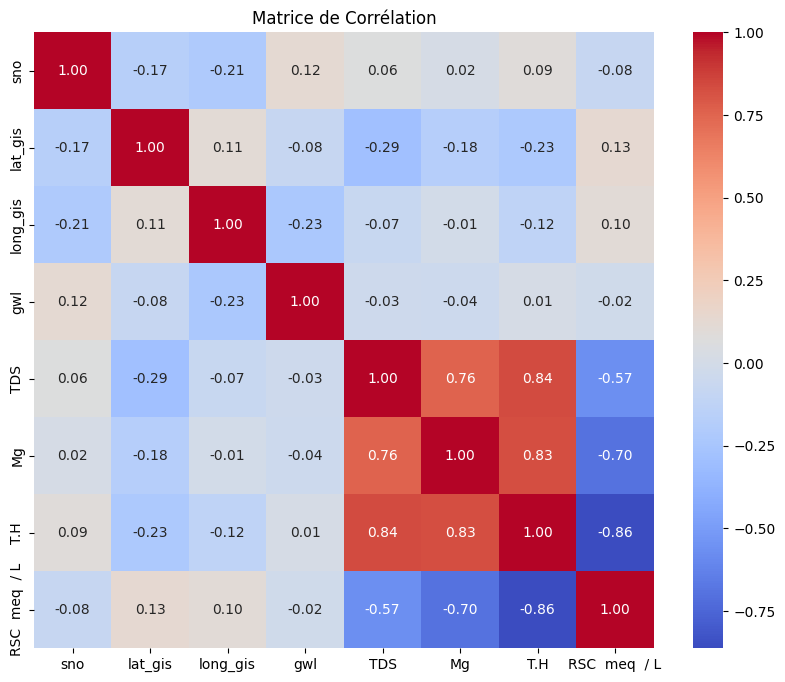

In [81]:
# Je selectionne  les colonnes spécifiées pour la matrice de corrélation
colonnes_a_garder = ['sno', 'lat_gis', 'long_gis', 'gwl', 'TDS', 'Mg', 'T.H', 'RSC  meq  / L']
donnees_selectionnees = donnees_combinees[colonnes_a_garder]

# Je calcul la matrice de corrélation
correlation_matrix = donnees_selectionnees.corr()



plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()


Reformulation de la cible

In [85]:

# Je charge  les données à partir des fichiers CSV
donnees_2018 = pd.read_csv(chemin_fichier_2018)
donnees_2019 = pd.read_csv(chemin_fichier_2019)
donnees_2020 = pd.read_csv(chemin_fichier_2020)

# Je prend la colonne 'Classification' comme cible
cible_2018 = donnees_2018['Classification']
cible_2019 = donnees_2019['Classification']
cible_2020 = donnees_2020['Classification']

# Je formule les étiquettes de la cible
reformulation = {
    'C2S1': 'Moderate',
    'C3S1': 'Poor',
    'C4S2': 'Bad',
    'C4S1': 'Bad',
    'C3S2': 'Poor',
    'C4S4': 'Bad',
    'C4S3': 'Bad',
    'C1S1': 'Good',
    'C3S4': 'Bad',
    'C3S3': 'Poor',
    'C2S2': 'Moderate'
}

cible_2018 = cible_2018.map(reformulation)
cible_2019 = cible_2019.map(reformulation)
cible_2020 = cible_2020.map(reformulation)

# Je supprime  les lignes où la cible n'est pas dans la liste de reformulation
cible_2018 = cible_2018.dropna()
cible_2019 = cible_2019.dropna()
cible_2020 = cible_2020.dropna()

# J'affiche les premières lignes des cibles reformulées
print("Cible 2018:")
print(cible_2018.head())

print("\nCible 2019:")
print(cible_2019.head())

print("\nCible 2020:")
print(cible_2020.head())


Cible 2018:
0    Moderate
1        Poor
2    Moderate
3    Moderate
4         Bad
Name: Classification, dtype: object

Cible 2019:
0         Bad
1    Moderate
2        Poor
3    Moderate
4    Moderate
Name: Classification, dtype: object

Cible 2020:
0        Poor
1        Poor
2    Moderate
3    Moderate
4    Moderate
Name: Classification, dtype: object


Concatenner

In [92]:

# Je concatene les données de toutes les années
donnees_combinees = pd.concat([donnees_2018, donnees_2019, donnees_2020], ignore_index=True)



Classe encodé

In [23]:

# Je cré une instance de LabelEncoder
label_encoder = LabelEncoder()

# j'applique  le LabelEncoder à la colonne "Classification"
donnees_combinees['Classification'] = label_encoder.fit_transform(donnees_combinees['Classification'])

# j'affiche les classes encodées
print("Classes encodées:", label_encoder.classes_)

Classes encodées: ['C1S1' 'C2S1' 'C2S2' 'C3S1' 'C3S2' 'C3S3' 'C3S4' 'C4S1' 'C4S2' 'C4S3'
 'C4S4' 'O.G' 'OG']


KNN

In [39]:

donnees_numeriques = donnees_numeriques.dropna()

X = donnees_numeriques.drop('Classification', axis=1)
y = donnees_numeriques['Classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modèle k-NN:", accuracy)


Exactitude du modèle k-NN: 0.925531914893617


Random forest

In [46]:


donnees_numeriques = donnees_numeriques.dropna()

X = donnees_numeriques.drop('Classification', axis=1)
y = donnees_numeriques['Classification']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_classifier.fit(X_train, y_train)


y_pred = random_forest_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modèle Random Forest:", accuracy)

Exactitude du modèle Random Forest: 0.9414893617021277


In [41]:

donnees_numeriques = donnees_numeriques.dropna()

X = donnees_numeriques.drop('Classification', axis=1)
y = donnees_numeriques['Classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC(random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modèle SVM:", accuracy)


Exactitude du modèle SVM: 0.9042553191489362


XGBOOST

In [47]:

donnees_numeriques = donnees_numeriques.dropna()

X = donnees_numeriques.drop('Classification', axis=1)
y = donnees_numeriques['Classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_classifier = xgb.XGBClassifier(random_state=42)

xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modèle XGBoost:", accuracy)


Exactitude du modèle XGBoost: 0.9521276595744681


F1 SCORE

In [43]:

from sklearn.metrics import f1_score

donnees_numeriques = donnees_numeriques.dropna()

X = donnees_numeriques.drop('Classification', axis=1)
y = donnees_numeriques['Classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_classifier = xgb.XGBClassifier(random_state=42)

xgb_classifier.fit(X_train, y_train)


y_pred = xgb_classifier.predict(X_test)


f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score du modèle XGBoost:", f1)


F1-score du modèle XGBoost: 0.9518740677971975


XGBOOST est pour le projet EAU le plus interressant et le plus précis